In [6]:
import os
import sys
import numpy as np
import re
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from os import listdir
from tensorflow.keras.layers import *
from time import time
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import Model
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import constraints
from tensorflow.keras.callbacks import *
from tensorflow.keras.applications.xception import Xception

Image 1 shape: (1024, 1024, 3)
Image 2 shape: (1024, 1024, 3)
Label shape: (1024, 1024)


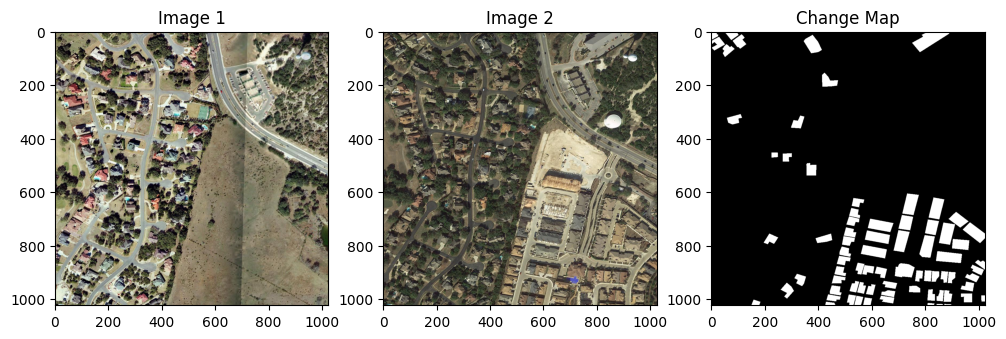

In [7]:
path = "D:/SujanD datasets/datasets/mdrifaturrahman33/levir-cd/versions/1/LEVIR CD"
image1 = cv2.imread(os.path.join(path, 'train/A/train_100.png'))
image2 = cv2.imread(os.path.join(path, 'train/B/train_100.png'))
label = cv2.imread(os.path.join(path, 'train/label/train_100.png'), 0)
print("Image 1 shape:", image1.shape)
print("Image 2 shape:", image2.shape )
print("Label shape:", label.shape)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)); plt.title('Image 1')
plt.subplot(1,3,2); plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)); plt.title('Image 2')
plt.subplot(1,3,3); plt.imshow(label, cmap='gray'); plt.title('Change Map')
plt.show()


In [ ]:
import os
import cv2
import numpy as np
import glob
batch_size=16
import cv2
import numpy as np

def agcd_data_generator(X1_paths, X2_paths, label_paths, batch_size=2, img_size=(512, 512)):
    assert len(X1_paths) == len(X2_paths) == len(label_paths), "Mismatched input lengths!"

    while True:
        for i in range(0, len(X1_paths), batch_size):
            batch_X1 = X1_paths[i:i+batch_size]
            batch_X2 = X2_paths[i:i+batch_size]
            batch_Y = label_paths[i:i+batch_size]

            X_batch = []
            Y_coarse = []
            Y_refined = []
            Y_attention = []

            for p1, p2, pl in zip(batch_X1, batch_X2, batch_Y):
                img1 = cv2.resize(cv2.imread(p1), img_size) / 255.0
                img2 = cv2.resize(cv2.imread(p2), img_size) / 255.0
                label = cv2.resize(cv2.imread(pl, cv2.IMREAD_GRAYSCALE), img_size) / 255.0
                label = (label > 0.5).astype(np.float32)

                combined = np.concatenate([img1, img2], axis=-1) 
                label = label[..., np.newaxis] 
                X_batch.append(combined)
                Y_coarse.append(label)
                Y_refined.append(label)
                Y_attention.append(label)

            X_batch = np.array(X_batch)
            Y_dict = {
                'coarse_output': np.array(Y_coarse),
                'refined_output': np.array(Y_refined),
                'attention_output': np.array(Y_attention)
            }

            yield X_batch, Y_dict


train_A_folder = r"D:\SujanD datasets\datasets\mdrifaturrahman33\levir-cd\versions\1\LEVIR CD\train\A_resized"
train_B_folder = "D:/SujanD datasets/datasets/mdrifaturrahman33/levir-cd/versions/1/LEVIR CD/train/B_resized"
train_label_folder = "D:/SujanD datasets/datasets/mdrifaturrahman33/levir-cd/versions/1/LEVIR CD/train/label_resized"
train_A_paths = sorted(glob.glob(os.path.join(train_A_folder, "*.png")))
train_B_paths = sorted(glob.glob(os.path.join(train_B_folder, "*.png")))
train_label_paths = sorted(glob.glob(os.path.join(train_label_folder, "*.png")))

test_A_folder = r"D:/SujanD datasets/datasets/mdrifaturrahman33/levir-cd/versions/1/LEVIR CD/test/A_resized"
test_B_folder = r"D:/SujanD datasets/datasets/mdrifaturrahman33/levir-cd/versions/1/LEVIR CD/test/B_resized"
test_L_folder = r"D:/SujanD datasets/datasets/mdrifaturrahman33/levir-cd/versions/1/LEVIR CD/test/label_resized"
test_A_paths = sorted(glob.glob(os.path.join(test_A_folder, "*.[pP][nN][gG]")))
test_B_paths = sorted(glob.glob(os.path.join(test_B_folder, "*.[pP][nN][gG]")))
test_L_paths = sorted(glob.glob(os.path.join(test_L_folder, "*.[pP][nN][gG]")))

validation_A_folder = r"D:/SujanD datasets/datasets/mdrifaturrahman33/levir-cd/versions/1/LEVIR CD/val/A_resized"
validation_B_folder = r"D:/SujanD datasets/datasets/mdrifaturrahman33/levir-cd/versions/1/LEVIR CD/val/B_resized"
validation_L_folder = r"D:/SujanD datasets/datasets/mdrifaturrahman33/levir-cd/versions/1/LEVIR CD/val/label_resized"
validation_A_paths = sorted(glob.glob(os.path.join(test_A_folder, "*.[pP][nN][gG]")))
validation_B_paths = sorted(glob.glob(os.path.join(test_B_folder, "*.[pP][nN][gG]")))
validation_L_paths = sorted(glob.glob(os.path.join(test_L_folder, "*.[pP][nN][gG]")))

train_ds =agcd_data_generator(train_A_paths, train_B_paths, train_label_paths, batch_size=2)
val_ds =  agcd_data_generator(validation_A_paths, validation_B_paths, validation_L_paths, batch_size=2)

steps_per_epoch = len(train_A_paths) // 2
val_steps = len(validation_A_paths) // 2
# X1_train,  y_train = load_dataset(train_A_paths, train_B_paths, train_label_paths)
# X1_val, y_val = load_dataset(test_A_paths, test_B_paths, test_L_paths)
# X1_test, y_test=load_dataset(validation_A_paths,validation_B_paths,validation_L_paths)

# y_train_bin = y_train[..., 1:2]
# y_val_bin = y_val[..., 1:2]
# y_test_bin = y_test[..., 1:2]
# train_generator = simple_data_generator(train_A_paths, train_B_paths, train_label_paths, batch_size=1, augment=True)
# val_generator   = simple_data_generator(test_A_paths, test_B_paths, test_L_paths, batch_size=1, augment=False)


In [ ]:
from tensorflow.keras import layers, models

def bottleneck_block(x, filters, stride=1, dilation=1):
    shortcut = x
    f1, f2, f3 = filters
    in_channels = x.shape[-1]

    x = layers.Conv2D(f1, 1, strides=1, padding='same', use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f2, 3, strides=stride, dilation_rate=dilation, padding='same', use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    x = layers.Conv2D(f3, 1, strides=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    if in_channels != f3 or stride != 1:
        shortcut = layers.Conv2D(f3, 1, strides=stride, padding='same', use_bias=False)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    return x
def dilated_resnet50(input_tensor):
    x = layers.Conv2D(64, 3, padding='same', strides=2, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(input_tensor)
    x = layers.Conv2D(64, 3, padding='same', strides=1, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.Conv2D(128, 3, padding='same', strides=1, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)
    x1 = x

    for _ in range(3):
        x = bottleneck_block(x, [128, 128, 256], stride=1)
    x2 = x  

    x = bottleneck_block(x, [256, 256, 512], stride=2)
    for _ in range(3):
        x = bottleneck_block(x, [256, 256, 512])
    x3 = x 

    x = bottleneck_block(x, [512, 512, 1024], stride=2)
    for _ in range(5):
        x = bottleneck_block(x, [512, 512, 1024])
    x4 = x 

    for _ in range(3):
        x = bottleneck_block(x, [1024, 1024, 2048], dilation=2)
    x5 = x

    return x2, x3, x4, x5
def cg_aspp(x, filters=256):
    b0 = layers.Conv2D(filters, 1, padding='same', use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(x)
    b0 = layers.BatchNormalization()(b0)
    b0 = layers.ReLU()(b0)

   
    b1 = layers.Conv2D(filters, 3, padding='same', dilation_rate=6, use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(x)
    b1 = layers.BatchNormalization()(b1)
    b1 = layers.ReLU()(b1)
    b2 = layers.Conv2D(filters, 3, padding='same', dilation_rate=12, use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(x)
    b2 = layers.BatchNormalization()(b2)
    b2 = layers.ReLU()(b2)
    b3= layers.Conv2D(filters, 3, padding='same', dilation_rate=18, use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(x)
    b3= layers.BatchNormalization()(b3)
    b3= layers.ReLU()(b3)

    b4 = layers.GlobalAveragePooling2D()(x)
    b4 = layers.Reshape((1, 1, x.shape[-1]))(b4)
    b4 = layers.Conv2D(filters, 1, padding='same', use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(b4)
    b4 = layers.BatchNormalization()(b4)
    b4 = layers.ReLU()(b4)
    b4 = layers.UpSampling2D(size=(x.shape[1], x.shape[2]), interpolation='bilinear')(b4)

    x_cat = layers.Concatenate()([b0, b1, b2, b3, b4]) 

    x_out = layers.Conv2D(filters, 1, padding='same', use_bias=False, kernel_regularizer=regularizers.l2(0.0001))(x_cat)
    x_out = layers.BatchNormalization()(x_out)
    x_out = layers.ReLU()(x_out)
    return x_out 

def SPAM_fn(X_inner, L_cm, w=0.0):
    L_cm = tf.image.resize(L_cm, tf.shape(X_inner)[1:3], method='bilinear')
    B, H, W, C = tf.shape(X_inner)[0], tf.shape(X_inner)[1], tf.shape(X_inner)[2], tf.shape(X_inner)[3]
    HW = H * W
    X_flat = tf.reshape(X_inner, [B, HW, C])
    L_flat = tf.reshape(L_cm, [B, HW, 1])
    R_f = X_flat * L_flat
    s = tf.reduce_sum(R_f, axis=1)  
    phi = tf.expand_dims(tf.expand_dims(s, axis=1), axis=1)  
    phi = tf.tile(phi, [1, H, W, 1]) 
    dot = tf.reduce_sum(X_inner * phi, axis=-1, keepdims=True)  
    SA = tf.nn.softmax(dot, axis=1)
    X_att = X_inner + w * SA  
    x = layers.Conv2D(256, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001))(X_att)
    x = layers.BatchNormalization()(x)
    return x

def cifu_module(X_L, X_H):
    X_F = layers.Concatenate(axis=-1)([X_L, X_H])  
    X_sq = layers.GlobalAveragePooling2D()(X_F)

    hidden_units = (X_sq.shape[-1] // 4)  
    shared_fc = layers.Dense(hidden_units, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(X_sq)

    CA_L = layers.Dense(X_L.shape[-1], activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001))(shared_fc)
    CA_H = layers.Dense(X_H.shape[-1], activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001))(shared_fc)

    CA_L = layers.Reshape((1, 1, X_L.shape[-1]))(CA_L)
    CA_H = layers.Reshape((1, 1, X_H.shape[-1]))(CA_H)

    X_L_att = layers.Multiply()([X_L, CA_L])
    X_H_att = layers.Multiply()([X_H, CA_H])

    X_out = layers.Concatenate(axis=-1)([X_L_att, X_H_att])  
    return X_out
def build_agcdetnet(input_shape=(512, 512, 6)):
    inputs = layers.Input(shape=input_shape)

    X1, X2, X3, X4 = dilated_resnet50(inputs)  

    X_AMS = cg_aspp(X4)  

    coarse_output = layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001))(X3)
    coarse_output = layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001))(coarse_output)
    coarse_output = layers.Conv2D(1, 1, padding='same', activation='sigmoid', kernel_regularizer=regularizers.l2(0.0001))(coarse_output)
    
    coarse_output = layers.UpSampling2D(size=(16, 16), interpolation='bilinear')(coarse_output)
    
    coarse_output = layers.Activation('linear', name='coarse_output')(coarse_output)
    X_refined = SPAM_fn(X_AMS, coarse_output, w=0.0)
    X_refined_up = layers.UpSampling2D(size=4, interpolation='bilinear')(X_refined)
    fused = cifu_module(X1, X_refined_up)
    x = layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001))(fused)
    x = layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.0001))(x)
    refined_output = layers.Conv2D(1, 1, padding='same', activation='sigmoid')(x)
    refined_output = layers.UpSampling2D(size=(512 // refined_output.shape[1], 512 // refined_output.shape[2]), interpolation='bilinear', name='refined_output')(refined_output)
    attention_output = layers.Conv2D(1, 1, padding='same', activation='sigmoid')(X_refined)
    attention_output = layers.UpSampling2D(size=16, interpolation='bilinear', name='attention_output')(attention_output)
    

    model = models.Model(inputs=inputs, outputs=[coarse_output, refined_output, attention_output], name='AGCDetNet')
    return model




In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


def bce_jaccard_loss(y_true, y_pred, lambda_j=1.0, epsilon=1e-7):
    y_true = tf.cast(tf.convert_to_tensor(y_true), tf.float32)
    y_pred = tf.cast(tf.convert_to_tensor(y_pred), tf.float32)

    y_true = tf.reshape(y_true, [-1, 512, 512, 1])
    y_pred = tf.reshape(y_pred, [-1, 512, 512, 1])

    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    bce = tf.reduce_mean(bce, axis=[1, 2])  

    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true + y_pred, axis=[1, 2, 3])
    jaccard = (intersection + epsilon) / (union - intersection + epsilon)
    jaccard_loss = 1.0 - jaccard

    return bce + lambda_j * jaccard_loss 






def agcdetnet_total_loss(lambda_j=1.0, lambda_s=0.1):
    def loss(y_true, outputs):
        coarse_output = outputs[0]
        refined_output = outputs[1]
        attention_map = outputs[2]

        master_loss = bce_jaccard_loss(y_true, refined_output, lambda_j)
        coarse_loss = bce_jaccard_loss(y_true, coarse_output, lambda_j)
        attention_loss = tf.keras.losses.binary_crossentropy(y_true, attention_map)

        return master_loss + coarse_loss + lambda_s * attention_loss

    return loss

optimizer = Adam(
    learning_rate=0.00125,
    beta_1=0.9,
    beta_2=0.99
)

model = build_agcdetnet()
model.compile(
    optimizer='adam',
    loss={
        'coarse_output': bce_jaccard_loss,
        'refined_output': bce_jaccard_loss,
        'attention_output': bce_jaccard_loss,
    },
    metrics={'refined_output': 'accuracy'}
)



model.summary()

Model: "AGCDetNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 512, 512, 6) 0                                            
__________________________________________________________________________________________________
conv2d_2662 (Conv2D)            (None, 256, 256, 64) 3520        input_40[0][0]                   
__________________________________________________________________________________________________
conv2d_2663 (Conv2D)            (None, 256, 256, 64) 36928       conv2d_2662[0][0]                
__________________________________________________________________________________________________
conv2d_2664 (Conv2D)            (None, 256, 256, 128 73856       conv2d_2663[0][0]                
__________________________________________________________________________________________

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "agcdetnet_best.keras",
        save_best_only=True,
        monitor="val_refined_output_accuracy",  
        mode="max"
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=7,
        restore_best_weights=True,
        mode='min'
    )
]

import tensorflow as tf

history = model.fit(
    train_ds,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps,
    epochs=50,
    callbacks=callbacks
)






Epoch 1/50
890/890 [==============================] - 294s 324ms/step - loss: 4.8918 - coarse_output_loss: 1.6235 - refined_output_loss: 1.0634 - attention_output_loss: 1.1379 - refined_output_accuracy: 0.9466 - val_loss: 4.8258 - val_coarse_output_loss: 1.7323 - val_refined_output_loss: 1.4171 - val_attention_output_loss: 1.2067 - val_refined_output_accuracy: 0.9476


C:\Users\NITK\anaconda3\envs\Shyam_Lal\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
890/890 [==============================] - 288s 324ms/step - loss: 3.9204 - coarse_output_loss: 1.6245 - refined_output_loss: 0.9325 - attention_output_loss: 1.0260 - refined_output_accuracy: 0.9530 - val_loss: 3.9651 - val_coarse_output_loss: 1.7323 - val_refined_output_loss: 0.9042 - val_attention_output_loss: 1.0771 - val_refined_output_accuracy: 0.9450
Epoch 3/50
890/890 [==============================] - 287s 323ms/step - loss: 3.6430 - coarse_output_loss: 1.6245 - refined_output_loss: 0.8378 - attention_output_loss: 0.9699 - refined_output_accuracy: 0.9620 - val_loss: 4.3579 - val_coarse_output_loss: 1.7323 - val_refined_output_loss: 1.3380 - val_attention_output_loss: 1.1128 - val_refined_output_accuracy: 0.9490
Epoch 4/50
890/890 [==============================] - 287s 323ms/step - loss: 3.5049 - coarse_output_loss: 1.6246 - refined_output_loss: 0.7757 - attention_output_loss: 0.9357 - refined_output_accuracy: 0.9677 - val_loss: 3.8771 - val_coarse_output_loss: 1.732

In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
import cv2
import os

def evaluate_change_detection(A_paths, B_paths, label_paths, threshold=0.5, batch_size=4):
    print(" Preparing validation data...")

    X_val = []
    y_val_bin = []
    for a_path, b_path, l_path in zip(A_paths, B_paths, label_paths):
        imgA = cv2.imread(a_path) / 255.0
        imgB = cv2.imread(b_path) / 255.0
        lbl = cv2.imread(l_path, cv2.IMREAD_GRAYSCALE) / 255.0

        combined = np.concatenate([imgA, imgB], axis=-1)
        X_val.append(combined)
        y_val_bin.append((lbl > 0.5).astype(np.uint8)[..., np.newaxis])

    X_val = np.array(X_val, dtype=np.float32)
    y_val_bin = np.array(y_val_bin, dtype=np.uint8)

    print("🔍 Predicting on validation set...")
    y_pred = model.predict(X_val, batch_size=batch_size)[1]  

    y_pred_bin = (y_pred > threshold).astype(np.uint8)

    y_pred_flat = y_pred_bin.flatten()
    y_true_flat = y_val_bin.flatten()

    TP = np.sum((y_true_flat == 1) & (y_pred_flat == 1))
    TN = np.sum((y_true_flat == 0) & (y_pred_flat == 0))
    FP = np.sum((y_true_flat == 0) & (y_pred_flat == 1))
    FN = np.sum((y_true_flat == 1) & (y_pred_flat == 0))

    accuracy  = (TP + TN) / (TP + TN + FP + FN + 1e-7)
    precision = TP / (TP + FP + 1e-7)
    recall    = TP / (TP + FN + 1e-7)
    f1        = 2 * precision * recall / (precision + recall + 1e-7)
    iou       = TP / (TP + FP + FN + 1e-7)
    kappa     = cohen_kappa_score(y_true_flat, y_pred_flat)

    print("\n Evaluation Metrics:")
    print(f" Accuracy:  {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall:    {recall:.4f}")
    print(f" F1 Score:  {f1:.4f}")
    print(f" IoU:       {iou:.4f}")
    print(f" Kappa:     {kappa:.4f}")


evaluate_change_detection(validation_A_paths, validation_B_paths, validation_L_paths)


🔍 Preparing validation data...
🔍 Predicting on validation set...

📊 Evaluation Metrics:
 Accuracy:  0.9796
 Precision: 0.8157
 Recall:    0.7912
 F1 Score:  0.8032
 IoU:       0.6712
 Kappa:     0.7925


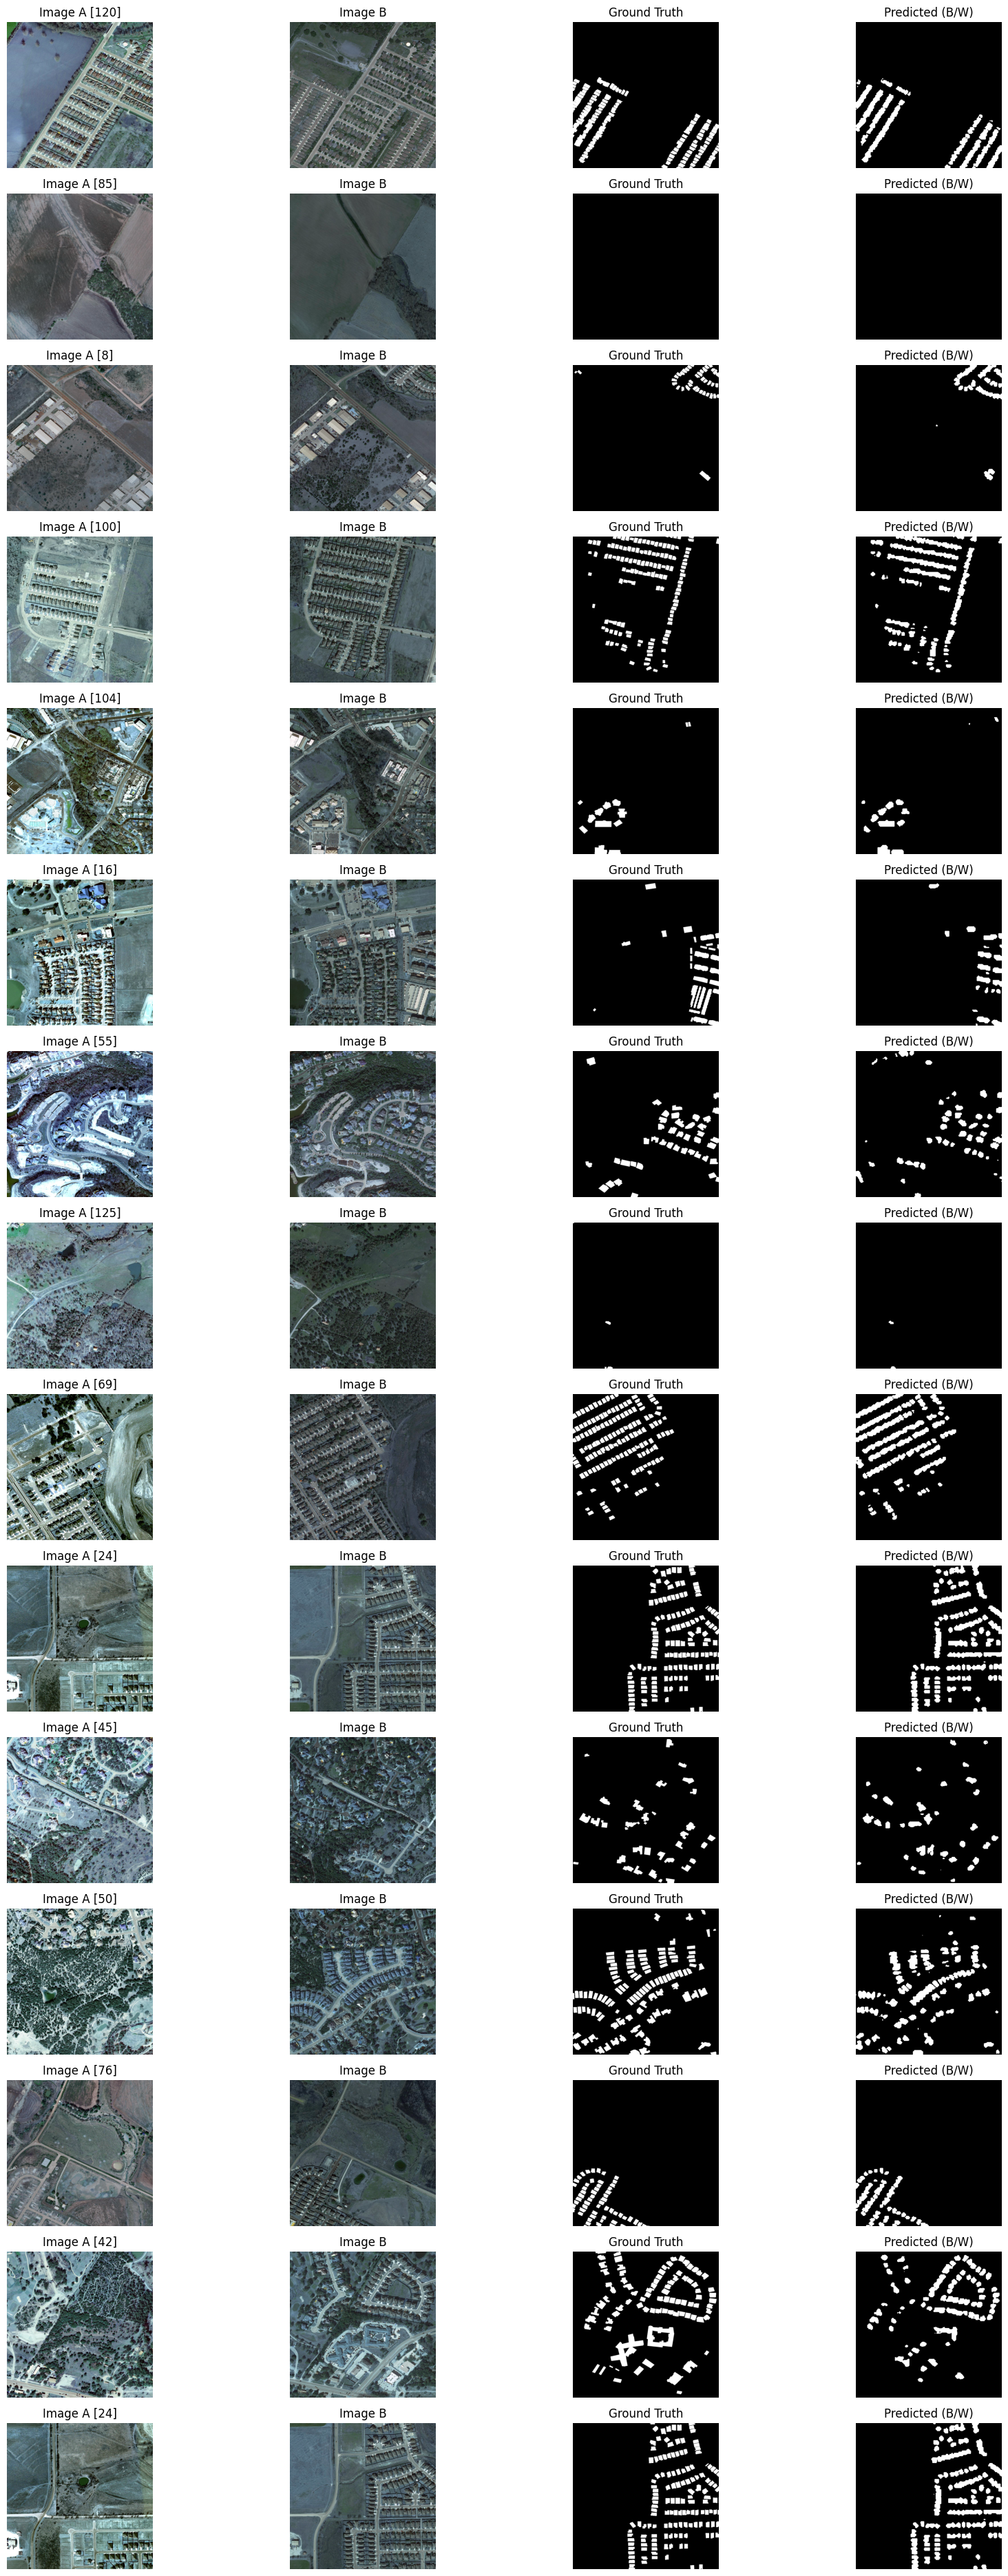

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

def predict_and_plot_raw_bw(A_paths, B_paths, label_paths, num_samples=6, threshold=0.5):
    plt.figure(figsize=(18, num_samples * 2.5))

    for i in range(num_samples):
        idx = random.randint(0, len(A_paths) - 1) 

        imgA = cv2.imread(A_paths[idx])
        imgB = cv2.imread(B_paths[idx])
        gt = cv2.imread(label_paths[idx], cv2.IMREAD_GRAYSCALE)

        imgA = cv2.resize(imgA, (512, 512)).astype('float32') / 255.0
        imgB = cv2.resize(imgB, (512, 512)).astype('float32') / 255.0
        combined = np.concatenate([imgA, imgB], axis=-1) 
        combined = np.expand_dims(combined, axis=0) 

        pred = model.predict(combined)[1][0, ..., 0]
        pred_bin = (pred > threshold).astype(np.uint8) * 255

        plt.subplot(num_samples, 4, i * 4 + 1)
        plt.imshow(imgA)
        plt.title(f"Image A [{idx}]")
        plt.axis('off')

        plt.subplot(num_samples, 4, i * 4 + 2)
        plt.imshow(imgB)
        plt.title("Image B")
        plt.axis('off')

        plt.subplot(num_samples, 4, i * 4 + 3)
        plt.imshow(gt, cmap='gray')
        plt.title("Ground Truth")
        plt.axis('off')

        plt.subplot(num_samples, 4, i * 4 + 4)
        plt.imshow(pred_bin, cmap='gray')
        plt.title("Predicted (B/W)")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


predict_and_plot_raw_bw(validation_A_paths, validation_B_paths, validation_L_paths, num_samples=15)


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


def dice_loss(y_true, y_pred, epsilon=1e-7):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    dice = (2. * intersection + epsilon) / (union + epsilon)
    return 1 - dice

def focal_loss(y_true, y_pred, alpha=0.25, gamma=2.0):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    bce_exp = tf.exp(-bce)
    focal = alpha * tf.pow((1 - bce_exp), gamma) * bce
    return tf.reduce_mean(focal, axis=[1, 2])

def bce_dice_focal_loss(y_true, y_pred, lambda_d=1.0, lambda_f=0.5):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_true = tf.reshape(y_true, [-1, 512, 512, 1])
    y_pred = tf.reshape(y_pred, [-1, 512, 512, 1])

    bce = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred), axis=[1, 2])
    d_loss = dice_loss(y_true, y_pred)
    f_loss = focal_loss(y_true, y_pred)
    return bce + lambda_d * d_loss + lambda_f * f_loss



optimizer = Adam(
    learning_rate=0.00125,
    beta_1=0.9,
    beta_2=0.99
)

model = build_agcdetnet()
model.compile(
    optimizer='adam',
    loss={
        'coarse_output':bce_dice_focal_loss,
        'refined_output':bce_dice_focal_loss,
        'attention_output':bce_dice_focal_loss,
    },
    metrics={'refined_output': 'accuracy'}
)
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        "agcdetnet2_best.keras",
        save_best_only=True,
        monitor="val_refined_output_accuracy",  
        mode="max"
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=3,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=7,
        restore_best_weights=True,
        mode='min'
    )
]

import tensorflow as tf

history = model.fit(
    train_ds,
    validation_data=val_ds,
    steps_per_epoch=steps_per_epoch,
    validation_steps=val_steps,
    epochs=50,
    callbacks=callbacks
)






Epoch 1/50
890/890 [==============================] - 294s 322ms/step - loss: 4.8705 - coarse_output_loss: 1.7130 - refined_output_loss: 1.0028 - attention_output_loss: 1.0659 - refined_output_accuracy: 0.9441 - val_loss: 4.5401 - val_coarse_output_loss: 1.8336 - val_refined_output_loss: 1.1954 - val_attention_output_loss: 1.0365 - val_refined_output_accuracy: 0.9479


C:\Users\NITK\anaconda3\envs\Shyam_Lal\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
890/890 [==============================] - 288s 323ms/step - loss: 3.7853 - coarse_output_loss: 1.7158 - refined_output_loss: 0.8185 - attention_output_loss: 0.9141 - refined_output_accuracy: 0.9529 - val_loss: 4.0957 - val_coarse_output_loss: 1.8336 - val_refined_output_loss: 0.8917 - val_attention_output_loss: 1.1270 - val_refined_output_accuracy: 0.9487
Epoch 3/50
890/890 [==============================] - 288s 323ms/step - loss: 3.5179 - coarse_output_loss: 1.7158 - refined_output_loss: 0.7264 - attention_output_loss: 0.8560 - refined_output_accuracy: 0.9619 - val_loss: 3.8427 - val_coarse_output_loss: 1.8336 - val_refined_output_loss: 0.9498 - val_attention_output_loss: 0.8735 - val_refined_output_accuracy: 0.9588
Epoch 4/50
890/890 [==============================] - 288s 323ms/step - loss: 3.4159 - coarse_output_loss: 1.7158 - refined_output_loss: 0.6739 - attention_output_loss: 0.8344 - refined_output_accuracy: 0.9665 - val_loss: 3.6046 - val_coarse_output_loss: 1.833

In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
import cv2
import os

def evaluate_change_detection(A_paths, B_paths, label_paths, threshold=0.47, batch_size=8):
    print("🔍 Preparing validation data...")

    X_val = []
    y_val_bin = []
    for a_path, b_path, l_path in zip(A_paths, B_paths, label_paths):
        imgA = cv2.imread(a_path) / 255.0
        imgB = cv2.imread(b_path) / 255.0
        lbl = cv2.imread(l_path, cv2.IMREAD_GRAYSCALE) / 255.0

        combined = np.concatenate([imgA, imgB], axis=-1) 
        X_val.append(combined)
        y_val_bin.append((lbl > 0.5).astype(np.uint8)[..., np.newaxis])

    X_val = np.array(X_val, dtype=np.float32)
    y_val_bin = np.array(y_val_bin, dtype=np.uint8)

    print("🔍 Predicting on validation set...")
    y_pred = model.predict(X_val, batch_size=batch_size)[1]  

    y_pred_bin = (y_pred > threshold).astype(np.uint8)

    y_pred_flat = y_pred_bin.flatten()
    y_true_flat = y_val_bin.flatten()

    TP = np.sum((y_true_flat == 1) & (y_pred_flat == 1))
    TN = np.sum((y_true_flat == 0) & (y_pred_flat == 0))
    FP = np.sum((y_true_flat == 0) & (y_pred_flat == 1))
    FN = np.sum((y_true_flat == 1) & (y_pred_flat == 0))

    accuracy  = (TP + TN) / (TP + TN + FP + FN + 1e-7)
    precision = TP / (TP + FP + 1e-7)
    recall    = TP / (TP + FN + 1e-7)
    f1        = 2 * precision * recall / (precision + recall + 1e-7)
    iou       = TP / (TP + FP + FN + 1e-7)
    kappa     = cohen_kappa_score(y_true_flat, y_pred_flat)

    print("\n📊 Evaluation Metrics:")
    print(f" Accuracy:  {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall:    {recall:.4f}")
    print(f" F1 Score:  {f1:.4f}")
    print(f" IoU:       {iou:.4f}")
    print(f" Kappa:     {kappa:.4f}")


evaluate_change_detection(validation_A_paths, validation_B_paths, validation_L_paths)


🔍 Preparing validation data...
🔍 Predicting on validation set...

📊 Evaluation Metrics:
 Accuracy:  0.9795
 Precision: 0.8166
 Recall:    0.7852
 F1 Score:  0.8006
 IoU:       0.6675
 Kappa:     0.7898
